In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

In [4]:
# Wife's age (numerical)
# Wife's education (categorical) 1=low, 2, 3, 4=high
# Husband's education (categorical) 1=low, 2, 3, 4=high
# Number of children ever born (numerical)
# Wife's religion (binary) 0=Non-Islam, 1=Islam
# Wife's now working? (binary) 0=Yes, 1=No
# Husband's occupation (categorical) 1, 2, 3, 4
#Standard-of-living index (categorical) 1=low, 2, 3, 4=high
#Media exposure (binary) 0=Good, 1=Not good
# Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term
data = pd.read_csv("contraceptive.csv")
data.head(10)



,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
5,19,4,4,0,1,1,3,3,0,1
6,38,2,3,6,1,1,3,2,0,1
7,21,3,3,1,1,0,3,2,0,1
8,27,2,3,3,1,1,3,4,0,1
9,45,1,1,8,1,1,2,2,1,1


Introduction: Through this project, we will be exploring the different factors that may pertain to the
usage of contraceptives. As part of the exploratory data analysis, we decided to incorporate as many
of the techniques from this course to assess the data by different factors. Such factors include, wife
age, religion and number of children to see if those factors are the ones that contribute the most
impact on the visulization of contraceptives for this group of women. While simultaneously, looking at the relationships of these different variables. Answer what varibles most affect the use of contraceptives? How religion plays a role in the contraceptive use and the media? How education level and standard of living affects the number of children ?

In [5]:
# looking at the different types for each column 
column_types = data.dtypes
column_types

wife_age              int64
wife_education        int64
husband_education     int64
num_child             int64
wife_religion         int64
wife_work             int64
husband_occupation    int64
standard_living       int64
media_exposure        int64
contraceptive         int64
dtype: object

In [6]:
#check to see if there is any null values 
data.isnull().values.any()

False

In [7]:
# the data is currently quantative, which means when it is being compared all of the varibles are being looked at 
#equally, therefore we make the data qualitive so we can understand the compasrison.
categorical_data = data
categorical_data = categorical_data.replace({'wife_education': {1: 'low', 2: 'average', 3: 'moderate', 4: "high" }, 
                     'husband_education' :{1: 'low', 2: 'average', 3: 'moderate', 4: "high"},
                    'standard_living': {1: 'low', 2: 'average', 3: 'moderate', 4: "high" },
                    'husband_occupation' :{1: 'one', 2: 'two', 3: 'three', 4: "four" },
                    'contraceptive':{1: "no use", 2: 'long-term', 3: 'short-term'},
                     "wife_religion" :{1:'islam', 0: 'non-islam'},
                     "wife_work":{0: 'yes', 1: 'no'},
                     'media_exposure':{ 0 : "good", 1: "not good"}
                     })


In [8]:
# we split the families into three different categories : small, medium, and large. We create these three categories
#in order to make it easier to compare the different variables within the data.
small_families = categorical_data[categorical_data['num_child'] <= 3]
medium_families = categorical_data[(categorical_data['num_child']> 3) & (data['num_child']<= 6)]
large_families = categorical_data[categorical_data['num_child'] > 6]
num_of_small_fam = small_families.shape[0] #908 small families 
num_of_medium_fam = medium_families.shape[0] #424 medium families 
num_of_large_fam = large_families.shape[0] #141 large families 
family_size = ['empty' for i in range(data.shape[0])]
for row in range(len(categorical_data)):
    if categorical_data['num_child'][row] <=3:
        family_size[row] = 'small'
    if categorical_data['num_child'][row] > 3 & categorical_data['num_child'][row] <=6:
        family_size[row] = 'medium' 
    if categorical_data['num_child'][row]> 6:
        family_size[row] = 'large' 
categorical_data['household_size'] = family_size 

In the scatterplot below we are looking at the correlation between the wife's age and the number of children, we see 
a positive correlation between these two varibles. Meaning as the woman gets older, the more children she seems to have.

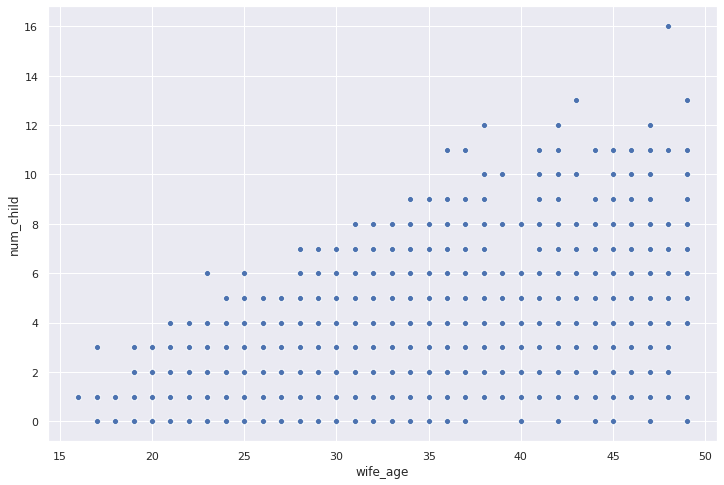

In [9]:
sns.set()
plt.figure(figsize=(12,8))
sns.scatterplot(x='wife_age', y='num_child', data=data)

This histogram, breaks down the distribution of the number of households, by the number of children they have. 
Most people have less kids, most have two to three kids.

3.2613713509843856

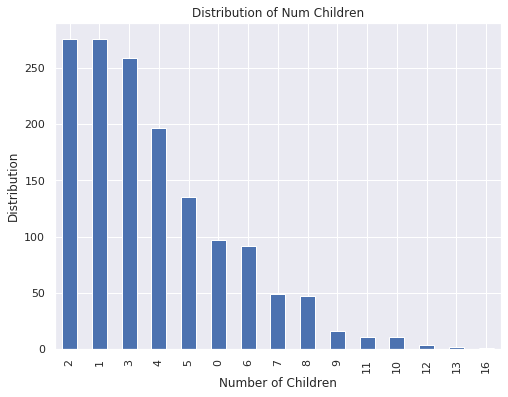

In [26]:
plt.figure(figsize=(8, 6))
data["num_child"].value_counts().plot(kind="bar")
plt.ylabel("Distribution")
plt.xlabel('Number of Children')
plt.title("Distribution of Num Children");
np.mean(data["num_child"])

In this boxplot, we are comparing age of the woman to the type of contraceptives they use. There is a large variety of different ages using no contraceptive. The average  age of woman using short term contraceptves is younger, while the average age of woman using long term contraceptives is older. This makes sense because younger woman are usually using contraceptives to postpone childbirth, while older woman are using it to prevent child birth. Also as the data showed us earlier, older woman tend to have more children and therefore, are more likely to not want to have anymore. This theory is only futhered by the foloowing boxplot which shows, woman with more children on avearage use longer term types of contraceptives.

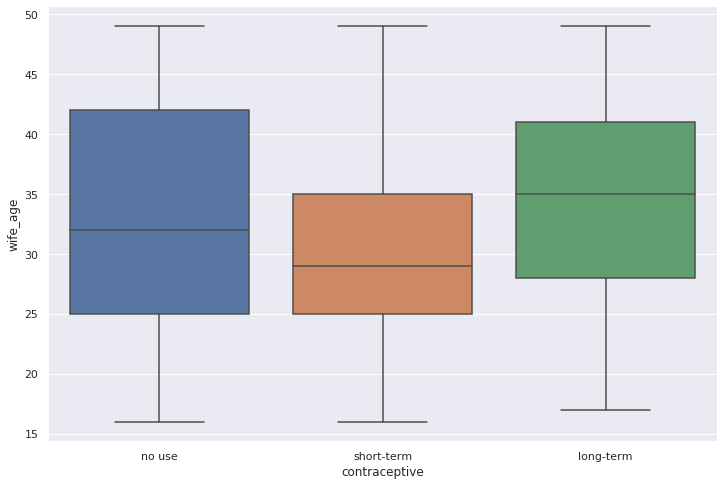

In [29]:
sns.set()
plt.figure(figsize=(12,8))
sns.boxplot(x ='contraceptive', y = 'wife_age', data = categorical_data , order = ['no use','short-term', 'long-term'])


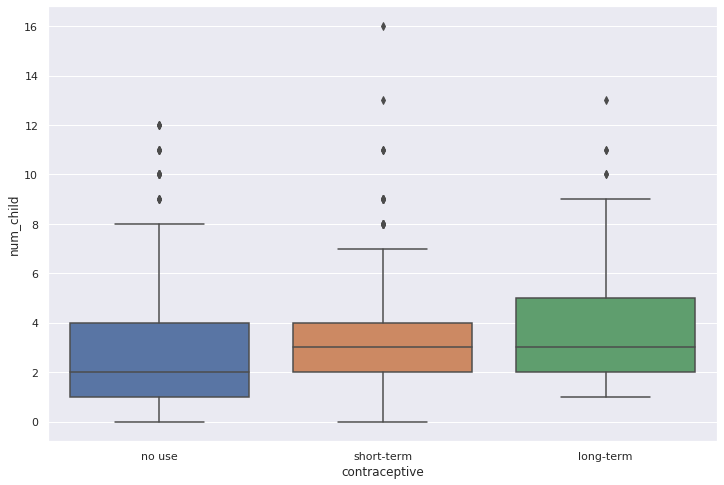

In [30]:
sns.set()
plt.figure(figsize=(12,8))
sns.boxplot(x ='contraceptive', y = 'num_child', data = categorical_data , order = ['no use','short-term', 'long-term'])

In [13]:
# this is a dataframe of woman that use long term contraceptives, we can look at this data in order to see what are 
#common varibles.
long_term = data[data["contraceptive"] == 3]
long_term

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
642,29,3,3,4,1,1,3,4,0,3
643,27,2,2,5,1,1,3,1,0,3
644,40,3,4,5,1,1,1,2,0,3
645,30,2,2,6,1,1,3,1,0,3
646,24,4,4,1,1,0,1,4,0,3
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


Here we cleaned the data such that only the women that used long term contraceptives. This is
important because I want to explore if there is a correlation between the type of contraceptives
that they use or if we can say anything about the use of contraceptives.

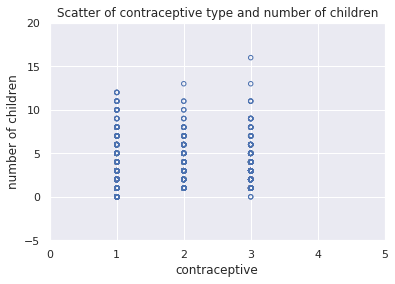

In [15]:
#this is a scatter plot showing the comparison between the number of children and contraceptive types. 
plt.scatter(data["contraceptive"], data["num_child"], s=20, facecolors='none', edgecolors='b')
plt.plot([55, 100],[55,100], 'r-')
plt.xlabel('contraceptive')
plt.ylabel('number of children')
plt.axis([0, 5,-5,20])
plt.title("Scatter of contraceptive type and number of children");

We wanted to see if scatter plot would be the best way to asses the relationship between the different
use of contraceptives and the number of children but that is not the best way. We think, that a
histogram would suit this data analysis best:

Text(0.5, 1.0, 'Num of children per contraceptive')

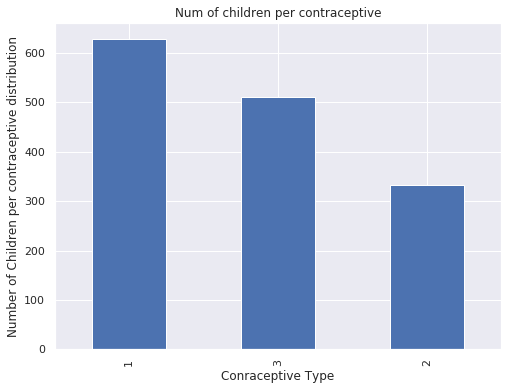

In [31]:
# this shows the same thing using a bar graph shows the number of children per contraceptive distribution 
plt.figure(figsize=(8, 6))
data["contraceptive"].value_counts().plot(kind="bar")
plt.ylabel("Number of Children per contraceptive distribution")
plt.xlabel("Conraceptive Type")
plt.title("Num of children per contraceptive")

This barplot, compares the wife's age, the contraceptive type, and number of children . We see that as the number of children and age increase so do the term length of the contraceptive. Further enforcing our prior theories.

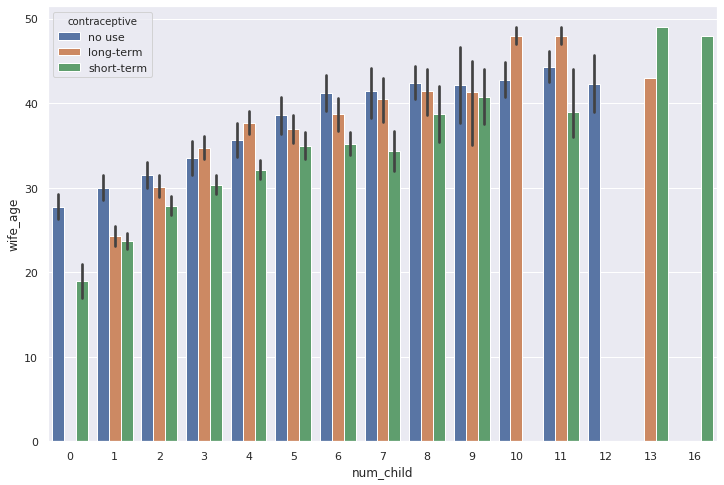

In [167]:
plt.figure(figsize=(12, 8))
sns.barplot(x="num_child", hue="contraceptive", y="wife_age", data= categorical_data)
plt.show()

In [32]:
# combine the average eductaion level of the household to see how this might affect the other variables  
edu_and_living_standard = categorical_data[["household_size",'wife_education', 'husband_education', 'standard_living']]   
edu_levels = data[['wife_education', 'husband_education']]
edu_and_living_standard['household_edu_avg'] = edu_levels.mean(axis= 1)
edu_and_living_standard

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,household_size,wife_education,husband_education,standard_living,household_edu_avg
0,small,average,moderate,moderate,2.5
1,large,low,moderate,high,2.0
2,large,average,moderate,high,2.5
3,large,moderate,average,moderate,2.5
4,large,moderate,moderate,average,3.0
...,...,...,...,...,...
1468,small,high,high,high,4.0
1469,small,high,high,high,4.0
1470,large,moderate,moderate,high,3.0
1471,medium,moderate,moderate,average,3.0


In [33]:
husband_higher_edu_count = len(edu_levels[edu_levels['husband_education'] > edu_levels['wife_education']])
wife_higher_edu_count = len(edu_levels[edu_levels['husband_education'] <edu_levels['wife_education']])
equal_edu_count= len(edu_levels[edu_levels['husband_education'] == edu_levels['wife_education']])
husband_more_edu_perct= round((husband_higher_edu_count/len(edu_levels))* 100) #40
wife_more_edu_perct= round((wife_higher_edu_count/len(edu_levels))* 100) # 5
equal_edu_percent = round((equal_edu_count/len(edu_levels))* 100) #55

The boxplot compares the household size, the average eductaion level, and standard of living. We see in households where the average education level is higher they tend to have a higher standard of living.

In the following boxplot we are comparing the average education level of the household, the size of household, and the type of contraceptives used. It seems as though education level on its own does not have a huge effect of the type contrceptives used though it may affect other varibles that do.

In the line graph below, we see this because families with higher eductaion level tend to have less children.

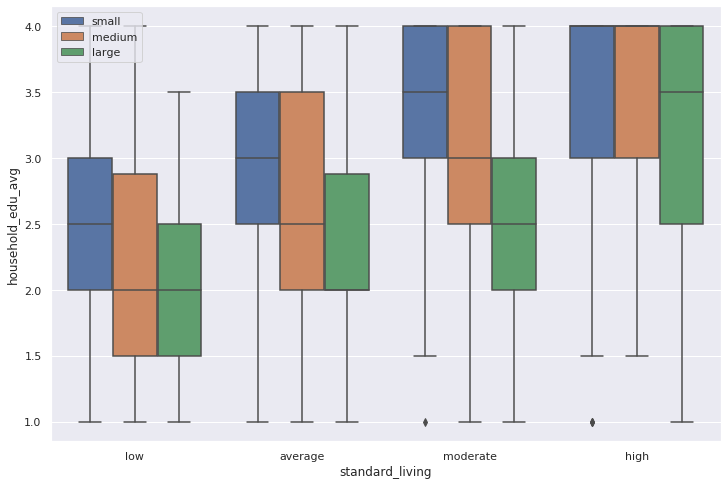

In [170]:
sns.set()
plt.figure(figsize=(12,8))
sns.boxplot(x ='standard_living', y = 'household_edu_avg', hue= 'household_size', data =edu_and_living_standard , order = ['low','average', 'moderate','high'],hue_order =["small", "medium", "large"])
plt.legend(loc='upper left')

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



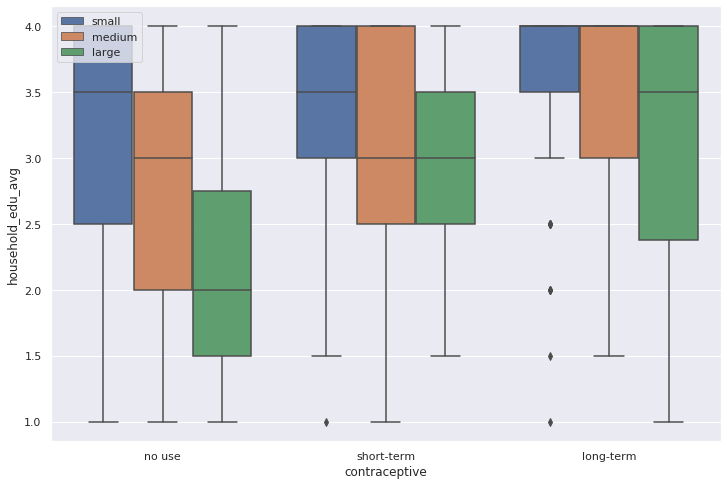

In [171]:
edu_and_living_standard['contraceptive'] = categorical_data['contraceptive']
edu_and_living_standard['num_child'] = categorical_data['num_child']
sns.set()
plt.figure(figsize=(12,8))
sns.boxplot(x ='contraceptive', y = 'household_edu_avg', hue= 'household_size', data =edu_and_living_standard , order = ['no use', "short-term", 'long-term'],hue_order =["small", "medium", "large"])
plt.legend(loc='upper left')


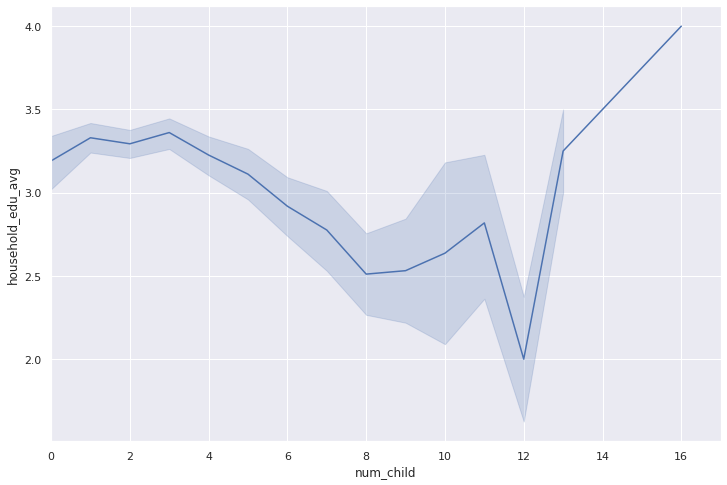

In [172]:

sns.set()
plt.figure(figsize=(12,8))
plt.xlim([0,17])
sns.lineplot(x='num_child', y='household_edu_avg', data= edu_and_living_standard )


Now we are going to use visulaization to look at how religion affects these factors, we see that there is more religious households, than non-religious. This data defines religious as islam verus non-islam. This affect how the data being looked at because it is only count one religion as relgious, to look at its affect on contraceptives. In relgious housholds, most households do not use contraceptives. This can be assumed to be a effect of how religion plays a role on peoples view of contraceptives. In non-relgious households, there is a smaller gap between the different types of contraceptives uses.


We also see when it comes to media exposure in relgious household it is far greater to have a neagtive assocation than in non-relgious households.

In [214]:
religion_and_contraceptive_type = categorical_data[['wife_religion', 'contraceptive']]
total = len(religion_and_contraceptive_type)
religious = religion_and_contraceptive_type[religion_and_contraceptive_type['wife_religion'] == 'islam'].groupby('contraceptive').count()
religious_num = len(religion_and_contraceptive_type[religion_and_contraceptive_type['wife_religion'] == 'islam'])
non_religious = religion_and_contraceptive_type[religion_and_contraceptive_type['wife_religion'] == 'non-islam'].groupby('contraceptive').count()
non_religious_num = len(religion_and_contraceptive_type[religion_and_contraceptive_type['wife_religion'] == 'non-islam'])
non_religious =non_religious.rename(columns={'wife_religion': 'count'})
religious = religious.rename(columns={'wife_religion': 'count'})
correlation =  pd.merge(non_religious, religious, how = 'inner', on ='contraceptive' )
correlation= correlation.rename(columns ={"count_x" : "non_religious","count_y": "religious"})
# number of religious households : 1253
# number of non-religious households : 220
correlation

,non_religious,religious
contraceptive,,
long-term,76,257
no use,75,554
short-term,69,442


In [236]:
religion_and_media  = categorical_data[['wife_religion', 'contraceptive', 'media_exposure']]
religion_and_media =religion_and_media.groupby( 'wife_religion')['media_exposure'].value_counts()
pd.DataFrame(religion_and_media)

media_exposure
wife_religion media_exposure                
islam         good                      1152
              not good                   101
non-islam     good                       212
              not good                     8

As one can see the this is a better way of interpreting the data and finding a relationship between
the use of contraceptive and the number of children. One asumption that I made before the
data exploration is that I thought that the number of children would be lowest if a woman used
Long term contraceptive(3) rather than short term (2). However, that was not the case. Long
term contraceptive has more number of children than short term; this can be do to many different
confounding factors. Or the fact that the woman started using different contraceptives after finished
having all her kids. Other factors need to be considered to find a relationship between number of
children and contraceptives.

We decided to incorporate standard of living, wife age to see what one can explore abou the contraceptive type. A box plot is perfectly suited for this analysis because it allows me to tie in many
different factors and visualize them in a way that categorizes qualitative data and shows a statistical distributiion of it. 1. The first boxplot is showing the distribution of womens age that have
Islam as their religion. 2. This is a boxplot of the women that do not claim Islam as their religion.

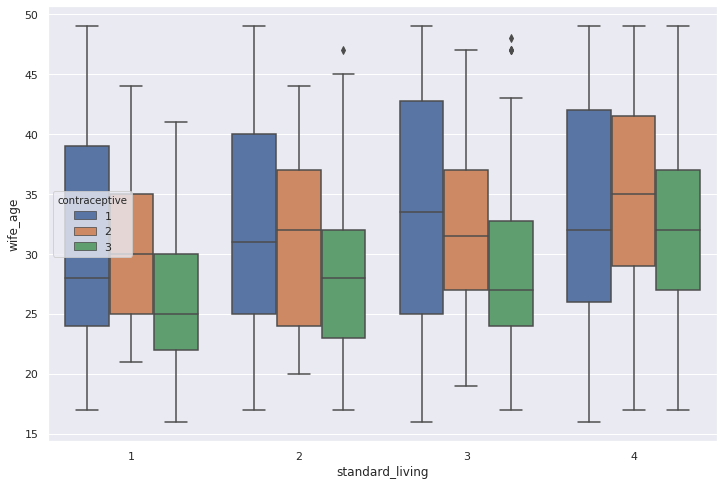

In [21]:
sns.set()
data[data["wife_age"].isnull() == False]
table1 = data[data["wife_religion"] == 1]
table2 = data[data["wife_religion"] == 0]
plt.figure(figsize= (12.0,8.0))
sns.boxplot(x ='standard_living', y = 'wife_age', hue= 'contraceptive', data = table1)

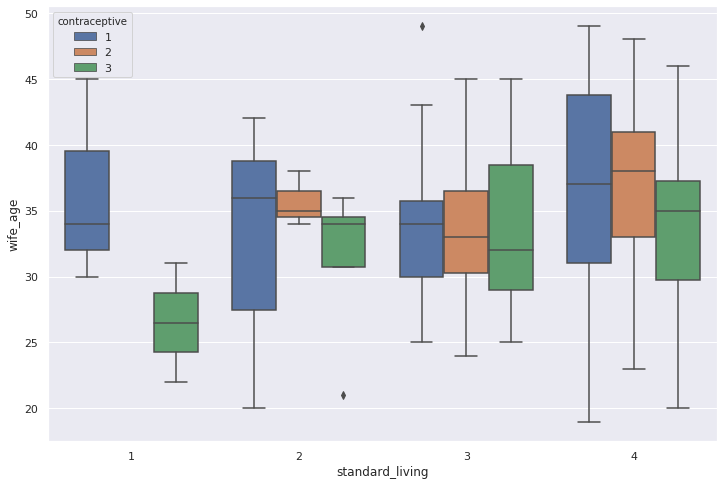

In [22]:
sns.set()
plt.figure(figsize= (12.0,8.0))
sns.boxplot(x ='standard_living', y = 'wife_age', hue= 'contraceptive', data =table2)

Through both of these boxplots I wanted to explore the socioeconomic classes of women with and
without religion. For starters, I inferred that the standard living says something about the women’s
socioeconomic class. For example if standard_living =1 then this can be considered working class;
2 is high working class/low tier middle class, 3 is high middle class, and 4 is upper class. Among
the other factors these are some of the conclusions that can be drawn from both boxplots: 1. In
the first box plot, one can see that the use of contraceptive regardless of standard living type or
contraceptive type, the range of usage among women’s age is very large. For example, the first
boxplot shows that women start using contraceptive starting as soon as 16 years old and as late
as 48. As opposed to the second boxplot, where women usually start in their mid 20’smkaing the
range narrow. This is in part because a woman’s belief can impact the age at which they start
using contraceptives. 2. The second box plot, the standard of living of 1 has no woman that use
contraceptive number 2. They only practice no use or short term use of contraceptives. Hence, I can
conclude that contraceptive activity of a woking class woman is plumetted by their socioeconmic
class. A possible explanation for this is that use of contraceptive requires money and an educated
background.

Conclusion: In our data analysis and visualization we used scatter plots, histograms and box plots to assess the different factors that affect the data. For example, we explored how socioeconomic background can affect the usage of contraceptives. Through this project we learned how to engineer data visualization by maneuvering data and choosing relevant factors that would help us solve problems.